<a href="https://colab.research.google.com/github/Ryukocharm/Tesi/blob/main/CNN_TESI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip -q immagini-galassie.zip -d immagini-galassie

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import os, random #os serve per comunicare con il sistema operativo
from skimage import io
import tensorflow as tf
from tensorflow import keras

In [3]:
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers

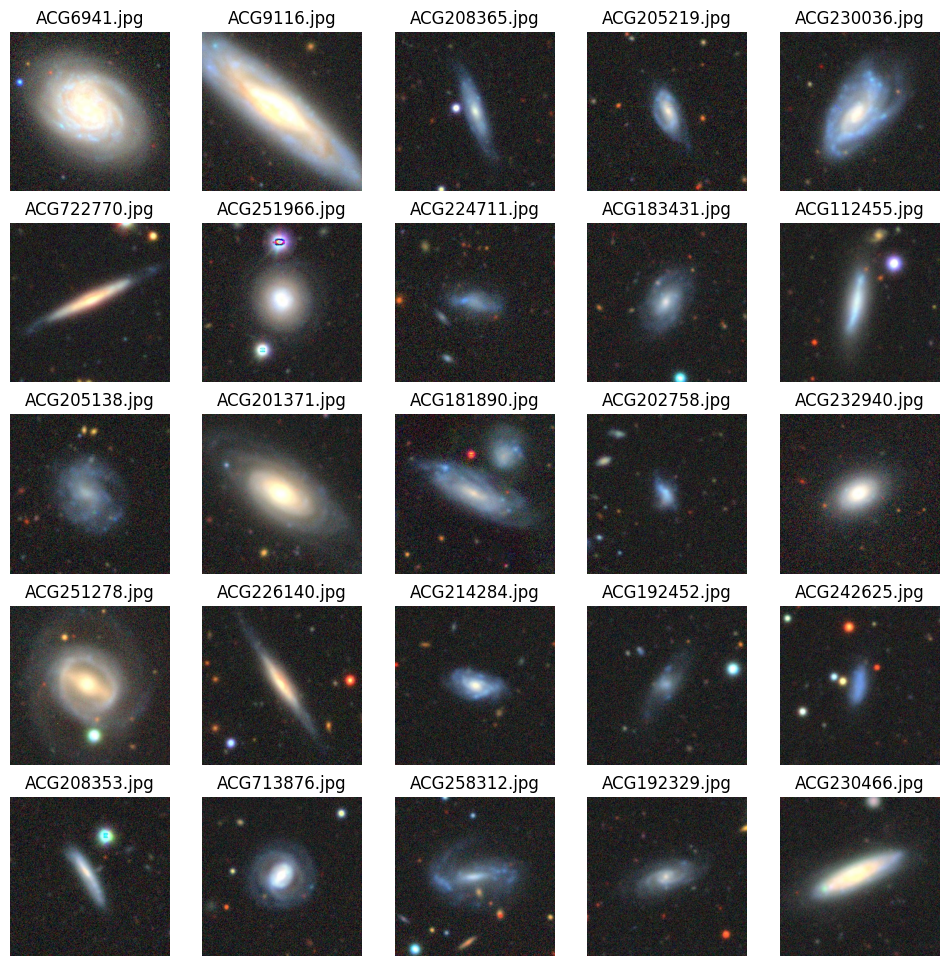

In [4]:
# mostra le immagini
plt.figure(figsize=(12,12))
root = "immagini-galassie"
for i in range(25):
  filename = random.choice(os.listdir(f"{root}")) #selezione casuale di file
  path = f"{root}/{filename}" #percorso finale
  img = mpimg.imread(path) #leggiamo l'immagine dal path con matplotlib
  plt.subplot(5, 5, i + 1)
  plt.imshow(img)
  plt.axis("off")
  plt.title(filename)
plt.show()

In [5]:
dataframe = pd.read_csv(filepath_or_buffer = "dataframe.csv",
                       sep=",",
                       header=0,
                       usecols = ["file_path", "logfgas"],
                       )

dataframe

,file_path,logfgas
0,/content/immagini-galassie/ACG331061.jpg,-0.44736
1,/content/immagini-galassie/ACG101869.jpg,-0.35081
2,/content/immagini-galassie/ACG331082.jpg,0.10447
3,/content/immagini-galassie/ACG101873.jpg,-0.15395
4,/content/immagini-galassie/ACG101877.jpg,0.89593
...,...,...
5020,/content/immagini-galassie/ACG332876.jpg,1.53828
5021,/content/immagini-galassie/ACG332880.jpg,0.05066
5022,/content/immagini-galassie/ACG332881.jpg,0.47444
5023,/content/immagini-galassie/ACG332884.jpg,-0.01308


In [6]:
from sklearn.model_selection import train_test_split
X = dataframe['file_path']
y = dataframe['logfgas']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_test

563     /content/immagini-galassie/ACG194729.jpg
433       /content/immagini-galassie/ACG4652.jpg
1085    /content/immagini-galassie/ACG201371.jpg
841       /content/immagini-galassie/ACG5314.jpg
3738      /content/immagini-galassie/ACG9149.jpg
                          ...                   
4600    /content/immagini-galassie/ACG716438.jpg
2768    /content/immagini-galassie/ACG222294.jpg
1122    /content/immagini-galassie/ACG722199.jpg
3470    /content/immagini-galassie/ACG230912.jpg
448     /content/immagini-galassie/ACG181638.jpg
Name: file_path, Length: 1005, dtype: object

In [8]:
len(X_train)

4020

In [9]:
len(X_test)

1005

In [10]:
test_dataframe = pd.concat([X_test, y_test], axis=1)

test_dataframe

,file_path,logfgas
563,/content/immagini-galassie/ACG194729.jpg,0.64478
433,/content/immagini-galassie/ACG4652.jpg,-0.37947
1085,/content/immagini-galassie/ACG201371.jpg,-0.87572
841,/content/immagini-galassie/ACG5314.jpg,-0.09503
3738,/content/immagini-galassie/ACG9149.jpg,-1.30829
...,...,...
4600,/content/immagini-galassie/ACG716438.jpg,0.41247
2768,/content/immagini-galassie/ACG222294.jpg,0.82845
1122,/content/immagini-galassie/ACG722199.jpg,-0.21036
3470,/content/immagini-galassie/ACG230912.jpg,0.25927


In [11]:
train_dataframe = pd.concat([X_train, y_train], axis=1)

train_dataframe

,file_path,logfgas
461,/content/immagini-galassie/ACG192860.jpg,0.14331
4191,/content/immagini-galassie/ACG258109.jpg,-0.11319
764,/content/immagini-galassie/ACG192389.jpg,0.46725
2031,/content/immagini-galassie/ACG6657.jpg,-1.50413
1105,/content/immagini-galassie/ACG203680.jpg,0.52338
...,...,...
3484,/content/immagini-galassie/ACG231599.jpg,0.63739
1865,/content/immagini-galassie/ACG211208.jpg,-0.31018
2766,/content/immagini-galassie/ACG220983.jpg,-1.36348
4799,/content/immagini-galassie/ACG267969.jpg,1.01964


In [48]:
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=(0.9,0.8),
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=5,
    validation_split=0.2)

test_datagen = ImageDataGenerator(
    rescale=1./255)

In [49]:
train_generator = datagen.flow_from_dataframe(
    dataframe=train_dataframe,
    x_col="file_path",
    y_col="logfgas",
    class_mode="raw",
    target_size=(256, 256),
    color_mode='rgb',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training')

val_generator = datagen.flow_from_dataframe(
    dataframe=train_dataframe,
    x_col="file_path",
    y_col="logfgas",
    class_mode="raw",
    target_size=(256, 256),
    color_mode='rgb',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation')

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_dataframe,
    x_col="file_path",
    y_col="logfgas",
    class_mode="raw",
    target_size=(256, 256),
    color_mode='rgb',
    batch_size=1,
    shuffle=False)

Found 3216 validated image filenames.
Found 804 validated image filenames.
Found 1005 validated image filenames.


In [50]:
net_model2 = tf.keras.Sequential()

net_model2.add(layers.Conv2D(32, 3, input_shape=(256, 256, 3), activation="relu"))
net_model2.add(layers.Conv2D(32, 3, activation="relu"))
net_model2.add(layers.MaxPooling2D())

net_model2.add(layers.Conv2D(64, 5, activation="relu"))
net_model2.add(layers.MaxPooling2D())
net_model2.add(layers.Dropout(0.4))

net_model2.add(layers.Conv2D(32, 3, activation="relu"))
net_model2.add(layers.MaxPooling2D())
net_model2.add(layers.Dropout(0.2))

net_model2.add(layers.Flatten())
net_model2.add(layers.Dense(32, activation="relu"))
net_model2.add(layers.Dense(1, activation="linear"))

In [51]:
net_model2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='mae'
)

In [52]:
training = net_model2.fit(
    train_generator,
    validation_data=val_generator,
    batch_size= 100,
    epochs=25)

Epoch 1/25
101/101 [==============================] - 69s 657ms/step - loss: 0.3799 - val_loss: 0.3196
Epoch 2/25
101/101 [==============================] - 67s 663ms/step - loss: 0.2256 - val_loss: 0.2901
Epoch 3/25
101/101 [==============================] - 66s 650ms/step - loss: 0.2216 - val_loss: 0.2795
Epoch 4/25
101/101 [==============================] - 67s 659ms/step - loss: 0.2121 - val_loss: 0.2668
Epoch 5/25
101/101 [==============================] - 66s 650ms/step - loss: 0.2050 - val_loss: 0.3133
Epoch 6/25
101/101 [==============================] - 67s 659ms/step - loss: 0.2019 - val_loss: 0.2492
Epoch 7/25
101/101 [==============================] - 66s 656ms/step - loss: 0.2042 - val_loss: 0.2414
Epoch 8/25
101/101 [==============================] - 66s 658ms/step - loss: 0.2032 - val_loss: 0.2897
Epoch 9/25
101/101 [==============================] - 65s 649ms/step - loss: 0.2025 - val_loss: 0.2161
Epoch 10/25
101/101 [==============================] - 67s 668ms/step - l

In [53]:
def plot_loss(history):
  plt.title("Mean Square Error")
  plt.plot(history.history['loss'], label='training loss')
  plt.plot(history.history['val_loss'], label='validation loss')
  plt.ylim([0, 0.5])
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

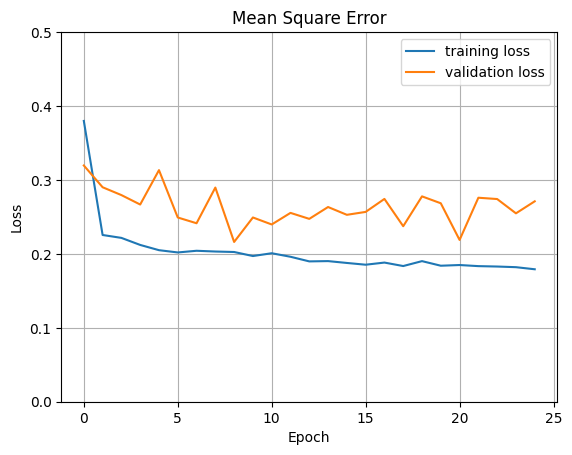

In [54]:
plot_loss(training)

In [55]:
net_model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 conv2d_13 (Conv2D)          (None, 252, 252, 32)      9248      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 126, 126, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 122, 122, 64)      51264     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 61, 61, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_6 (Dropout)         (None, 61, 61, 64)       

In [56]:
testing = net_model2.predict(test_generator)
testing

1005/1005 [==============================] - 3s 3ms/step


array([[ 0.64800847],
       [-0.12976325],
       [-0.35432062],
       ...,
       [ 0.27699357],
       [ 0.2228816 ],
       [ 0.6593126 ]], dtype=float32)

In [57]:
test_dataframe

,file_path,logfgas
563,/content/immagini-galassie/ACG194729.jpg,0.64478
433,/content/immagini-galassie/ACG4652.jpg,-0.37947
1085,/content/immagini-galassie/ACG201371.jpg,-0.87572
841,/content/immagini-galassie/ACG5314.jpg,-0.09503
3738,/content/immagini-galassie/ACG9149.jpg,-1.30829
...,...,...
4600,/content/immagini-galassie/ACG716438.jpg,0.41247
2768,/content/immagini-galassie/ACG222294.jpg,0.82845
1122,/content/immagini-galassie/ACG722199.jpg,-0.21036
3470,/content/immagini-galassie/ACG230912.jpg,0.25927


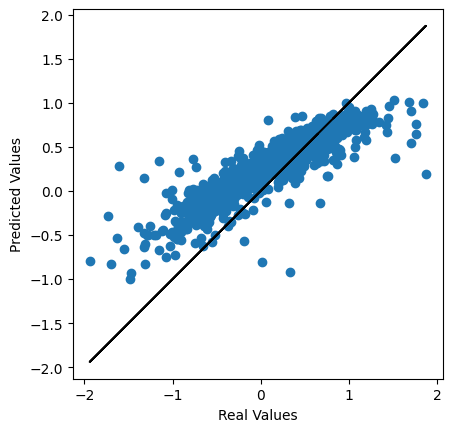

In [58]:
x_line = y_test
y_line = x_line
plt.plot(x_line, y_line, color='k')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.axis('square')

plt.scatter(y_test, testing)

In [59]:
from sklearn.metrics import mean_absolute_error
y_true = y_test
y_pred = testing
mean_absolute_error(y_true, y_pred)

0.2873567281386271